<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF OPE - 2019</span></p>
<p><font size="4">  UE Machine Learning and advanced processing methods for multi-sensor data  </font></p>
<p></p>
<p><font size="5">  Notebook 03: Python lab - Clustering </font></p>
</p></br>
</p>
</CENTER>

# <span style="color:#00B8DE"> 1. Kmeans clustering algorithms</span>

In [ ]:
import numpy as np
from skimage import io,color
from matplotlib import pyplot as plt
import cvxopt
from sklearn.datasets import make_blobs  # Import make_blobs from sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles


#### Question 1: Generate a random dataset in two dimensions which is divided into $K$ groups. Each group has N elements and centered to K given centers.

In [ ]:

def generate_data(centers, nb_elements):
    X, y = make_blobs(n_samples=nb_elements * len(centers), centers=centers, random_state=0)
    return X, y





#### Question 2: Plot the generated data

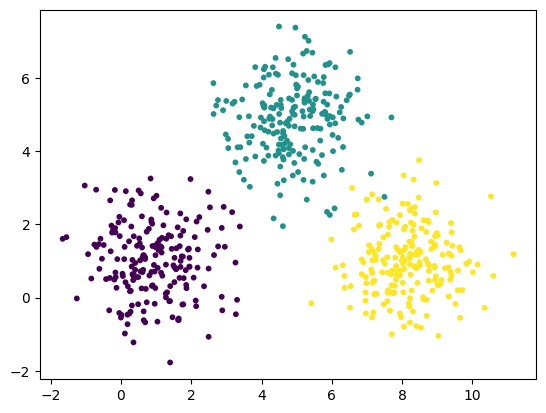

(array([[ 8.30833125, -0.37808347],
       [ 2.86755799,  0.02272212],
       [ 9.32646164,  0.03539358],
       ...,
       [ 7.35281857,  1.47224715],
       [ 8.50723895,  0.8837703 ],
       [ 1.61407937,  1.92220667]]), array([2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0,
       2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0,

In [ ]:

# test
centers = np.array([[1,1], [5,5], [8,1]])
nb_elements = 200
data = generate_data(centers, nb_elements)
plt.scatter(data[0][:, 0],data[0][:, 1],c=data[1],s=10)
plt.show()
print (data)


# figure


#### Question 3: Implement Kmeans algorithm

In [ ]:
from numpy.lib.polynomial import polyint
# @title
# Kmeans algorithm
def distance_carre(A,B):
  return((A[0]-B[0])**2+(A[1]-B[1])**2)
def matrice_dist(data,init_centers):
  nb_centers=len(init_centers) #Colonnes
  nb_points=len(data[0][:, 0]) #Lignes
  M=np.zeros((nb_points,nb_centers))
  for i in range(nb_points):
    for j in range(nb_centers):
      M[i,j]=distance_carre(init_centers[j],data[0][i])
  return M
def assign(data,init_centers):
  M_dist=matrice_dist(data,init_centers)
  assignment=[]
  nb_centers=len(init_centers) #Colonnes
  nb_points=len(data[0][:, 0]) #Lignes
  for i in range(nb_points):
    center = np.argmin(M_dist[i])
    assignment.append([data[0][i],center])
  return(assignment)
def recalculate_center(assignment,centers):
  new_centers=[]
  for k in range(len(centers)):
    list_point_k=[]
    for j in range(len(assignment)):
      if assignment[j][1]==k:
        list_point_k.append(assignment[j][0])
    list_point_k = np.array(list_point_k)
    list_x_values = [point[0] for point in list_point_k]
    list_y_values = [point[1] for point in list_point_k]
    new_centers.append(list([np.mean(list_x_values), np.mean(list_y_values)]))
    dist=0
    for i in range(len(new_centers)):
       # Convertir les listes en tableaux NumPy
     new_center = np.array(new_centers[i])
     center = np.array(centers[i])
     # Calculer la distance entre les deux centres de clusters
     dist += np.linalg.norm(new_center - center)
  return(new_centers,dist)


def Kmeans(data, init_centers):
  epsilon=10e-3
  dist=10
  centers=init_centers
  while dist>epsilon:
    clusters=assign(data,centers)
    centers,dist=recalculate_center(clusters,centers)
  return centers, clusters



#### Question 4: Plot the segmented result using Kmeans

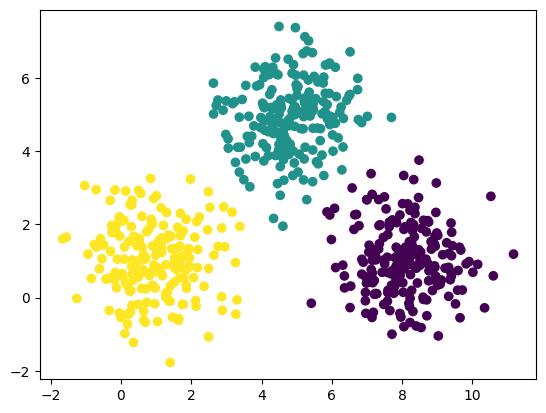

In [ ]:

# test Kmeans algo
def initialize_center(X, nb_centers):
    ma = np.max(X, axis=0)
    mi = np.min(X, axis=0)
    centers = np.random.rand(nb_centers, X.shape[1]) * (ma-mi) + mi
    return centers
init_centers =initialize_center(data[0],3)

new_centers, new_clusters = Kmeans(data, init_centers)
X = [item[0][0] for item in new_clusters]
Y=[item[0][1] for item in new_clusters]
cluster = [item[1] for item in new_clusters]
# Définir la palette de couleurs
cmap = plt.cm.tab10

# Dessiner les points
plt.scatter(X,Y, c=cluster)


# Afficher le graphique
plt.show()

# figure





In [ ]:
# @title

def distance_carre(A,B):
  return((A[0]-B[0])**2+(A[1]-B[1])**2)
def matrice_dist(data,init_centers):
  nb_centers=len(init_centers) #Colonnes
  nb_points=len(data[0][:, 0]) #Lignes
  M=np.zeros((nb_points,nb_centers))
  for i in range(nb_points):
    for j in range(nb_centers):
      M[i,j]=distance_carre(init_centers[j],data[0][i])
  return M
def assign(data,init_centers):
  M_dist=matrice_dist(data,init_centers)
  assignment=[]
  nb_centers=len(init_centers) #Colonnes
  nb_points=len(data[0][:, 0]) #Lignes
  for i in range(nb_points):

    center = np.argmin(M_dist[i])
    assignment.append([data[0][i],center])
  return(assignment)
def recalculate_center(assignment,centers):
  new_centers=[]
  for k in range(len(centers)):
    list_point_k=[]
    for j in range(len(assignment)):
      if assignment[j][1]==k:
        list_point_k.append(assignment[j][0])
    list_point_k = np.array(list_point_k)
    new_centers.append(list([np.mean(list_point_k[:, 0]), np.mean(list_point_k[:, 1])]))
    dist=0
    for i in range(len(new_centers)):
     dist+= np.linalg.norm(new_centers[i] - centers[i])
  return(new_centers,dist)
print(assign(data,centers))
print(recalculate_center(assign(data,centers),centers))

[[array([ 8.30833125, -0.37808347]), 2], [array([2.86755799, 0.02272212]), 0], [array([9.32646164, 0.03539358]), 2], [array([5.23482153, 7.13215341]), 1], [array([6.9673569 , 0.56325166]), 2], [array([ 2.8831507 , -0.34775906]), 0], [array([ 0.73226646, -0.12801133]), 0], [array([0.13877431, 2.91006495]), 0], [array([4.86809136, 5.40476181]), 1], [array([8.32486962, 1.99711798]), 2], [array([-0.12682581,  0.26932225]), 0], [array([4.65254935, 4.41873152]), 1], [array([8.26902407, 1.52491786]), 2], [array([4.14102761, 4.10105784]), 1], [array([2.64813493, 1.16422776]), 0], [array([7.69921612, 0.33939141]), 2], [array([0.79309632, 1.88017891]), 0], [array([6.12859406, 5.49600095]), 1], [array([ 8.22739278, -0.01673865]), 2], [array([-0.54079701,  1.06326199]), 0], [array([5.92950511, 5.58222459]), 1], [array([7.06211977, 1.43310795]), 2], [array([6.75498615, 4.86701158]), 1], [array([4.19437349, 3.88168808]), 1], [array([6.85238906, 0.64188592]), 2], [array([5.11514787, 4.62085244]), 1],

#### Question 5: Demonstrate performance of method in a quantitative manner
Pour demontrer la performance de la methode, on peut calculer les coefficients suivants:
1) coeffiecient de silhouette inter et intra pour mesurer la cohesion entre les objets d'un meme cluster et separation par rapport aux objets des autres clusters.
2) le coefficient d'homogenite Q qui prend en consideration l'homogenite entre les clusters mais pas la separation entre eux


# <span style="color:#00B8DE"> 2. Image segmentation</span>

#### Question 6: Use io.imread function from skimage to read satellite image, called TF0v7 (from SAT data)  then show this image

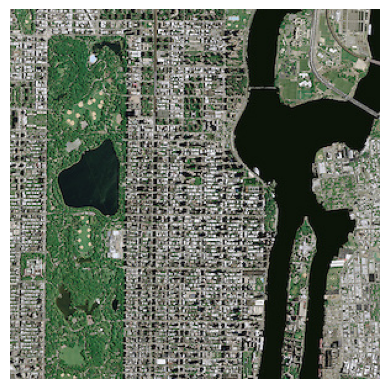

In [ ]:
# read image
 # Replace 'TF0v7.jpg' with the actual file path of your satellite image
image_path = '/content/TFOv7.png'

# Read the satellite image using io.imread
satellite_image = io.imread(image_path)

# Display the image using matplotlib
plt.imshow(satellite_image)
plt.axis('off')  # Turn off the axis labels
plt.show()


#### Question 7: Use Kmeans algorithm to segment this image and show the result. Note that it contains three classes = 'building', 'vegetation', and  'water'


In [ ]:
k=3 #nb_clusters
height, width, depth = satellite_image.shape
print(height,width,depth)
image_2d = satellite_image.reshape(height * width, depth)
print(image_2d[1])
init_centers=initialize_center(image_2d, k)
print(init_centers)
data = np.array(image_2d)

# Générez des étiquettes (par exemple, tous les zéros)
labels = np.zeros(data.shape[0], dtype=int)

# Concaténez les données et les étiquettes dans le format souhaité
result = (data, labels)

# Maintenant, `result` contient à la fois les données et les étiquettes
print(result)
#Nouvelle version de K-Means avec data à 3D
def distance_carree(point1, point2):
    distance = np.linalg.norm(np.array(point1) - np.array(point2))
    return distance
def matrice_dist(data,init_centers):
  nb_centers=len(init_centers) #Colonnes
  nb_points=len(data[0][:, 0]) #Lignes
  M=np.zeros((nb_points,nb_centers))
  for i in range(nb_points):
    for j in range(nb_centers):
      M[i,j]=distance_carre(init_centers[j],data[0][i])
  return M
def assign(data,init_centers):
  M_dist=matrice_dist(data,init_centers)
  assignment=[]
  nb_centers=len(init_centers) #Colonnes
  nb_points=len(data[0][:, 0]) #Lignes
  for i in range(nb_points):
    center = np.argmin(M_dist[i])
    assignment.append([data[0][i],center])
  return(assignment)
def recalculate_center(assignment,centers):
  new_centers=[]
  for k in range(len(centers)):
    list_point_k=[]
    for j in range(len(assignment)):
      if assignment[j][1]==k:
        list_point_k.append(assignment[j][0])
    list_point_k = np.array(list_point_k)
    list_x_values = [point[0] for point in list_point_k]
    list_y_values = [point[1] for point in list_point_k]
    list_z_values = [point[2] for point in list_point_k]
    new_centers.append(list([np.mean(list_x_values), np.mean(list_y_values),np.mean(list_z_values)]))
    dist=0
    for i in range(len(new_centers)):
       # Convertir les listes en tableaux NumPy
     new_center = np.array(new_centers[i])
     center = np.array(centers[i])
     # Calculer la distance entre les deux centres de clusters
     dist += np.linalg.norm(new_center - center)
  return(new_centers,dist)


def Kmeans(data, init_centers):
  epsilon=10e-3
  dist=10
  centers=init_centers
  while dist>epsilon:
    clusters=assign(data,centers)
    centers,dist=recalculate_center(clusters,centers)
  return centers, clusters
new_centers, new_clusters=Kmeans(result,init_centers)
couleurs=[[0,0,255],[0,255,0],[255,255,255]]
segmented_image=np.zeros(satellite_image.shape).reshape((-1,3))
for i in range(segmented_image.shape[0]):
  segmented_image[i,:]=new_centers[new_clusters[i]]
segmented_image=segmented_image.reshape(satellite_image.shape).astype(int)
plt.imshow(segmented_image)

300 300 3
[83 63 56]
[[115.36427804 149.00789933 118.52138156]
 [193.09078667 242.64575355 153.68771303]
 [199.03023637 251.39915137 186.92846429]]
(array([[149, 147, 134],
       [ 83,  63,  56],
       [ 76,  79,  72],
       ...,
       [159, 154, 151],
       [170, 153, 163],
       [151, 154, 159]], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0]))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-61424049f779>", line 69, in <cell line: 69>
    new_centers, new_clusters=Kmeans(result,init_centers)
  File "<ipython-input-8-61424049f779>", line 66, in Kmeans
    clusters=assign(data,centers)
  File "<ipython-input-8-61424049f779>", line 31, in assign
    M_dist=matrice_dist(data,init_centers)
  File "<ipython-input-8-61424049f779>", line 28, in matrice_dist
    M[i,j]=distance_carre(init_centers[j],data[0][i])
  File "<ipython-input-6-7b1e3a002b5e>", line 3, in distance_carre
    def distance_carre(A,B):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceba

TypeError: ignored

#### Question 8: Use PCA method to reduce the image in two dimensions and show the result. (Use the svd function from numpy.linalg)

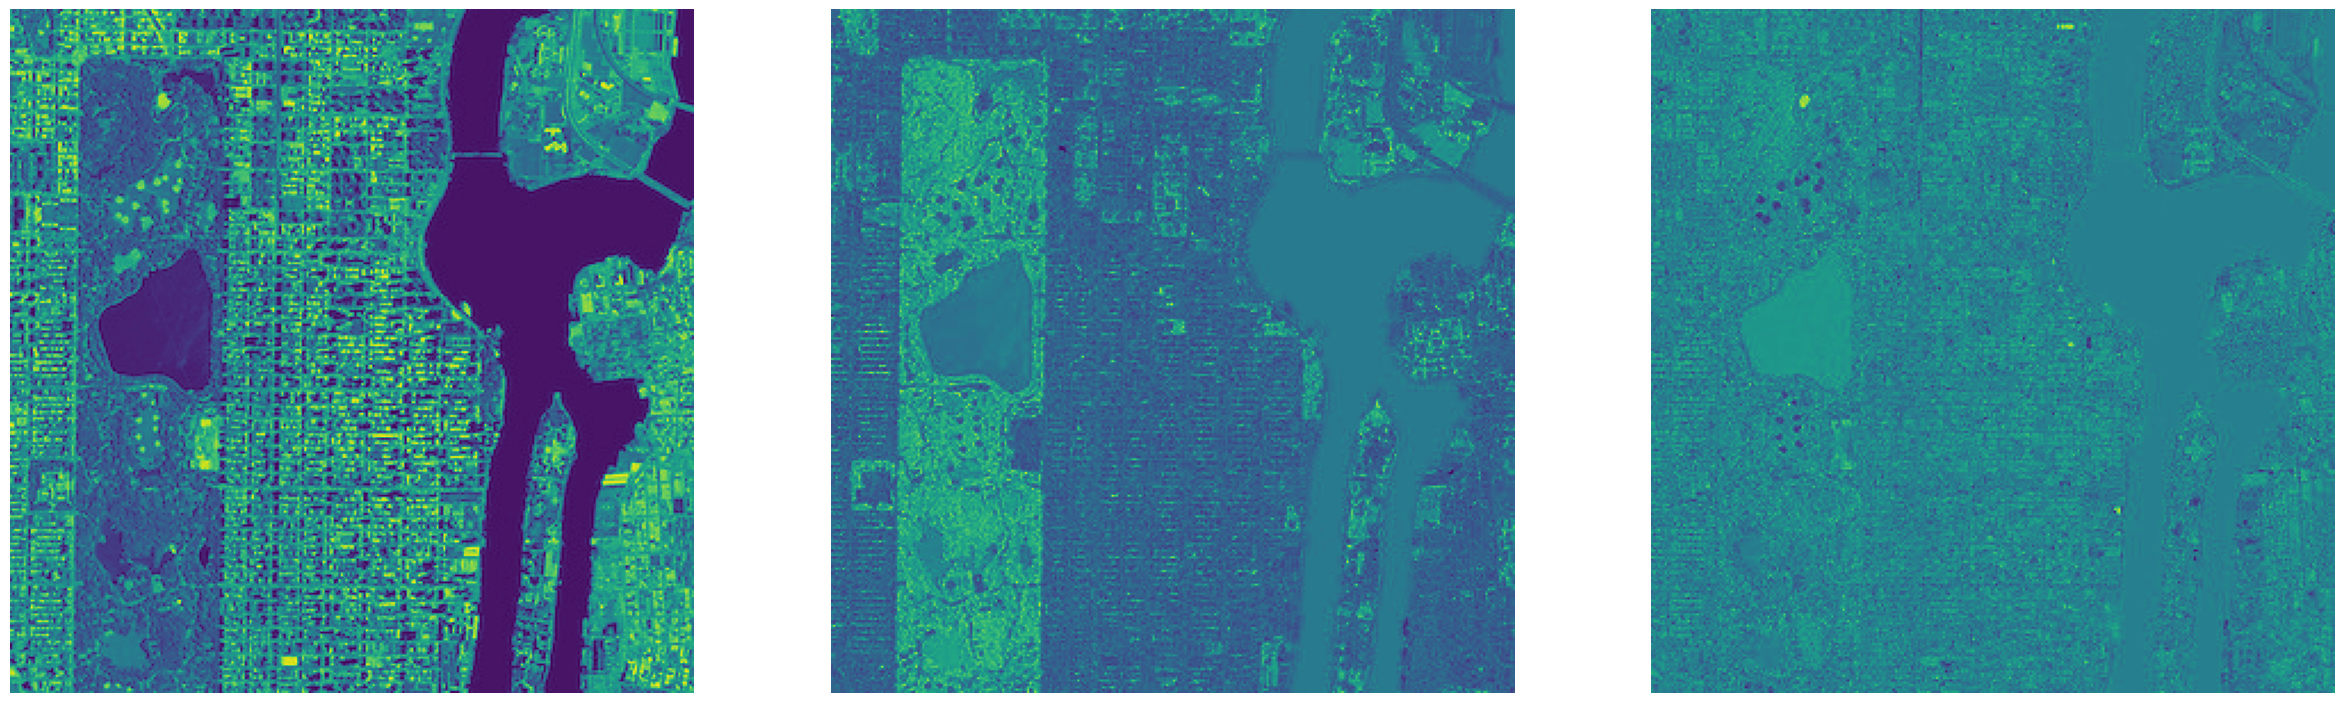

In [ ]:
from skimage import io
import numpy as np
from numpy.linalg import svd


U, S, Vt = np.linalg.svd(satellite_image.reshape((-1,3)), full_matrices=False)

imgs = []

for i in range(3):
    U_reduced = U[:, i]
    S_reduced = S[i]
    Vt_reduced = Vt[0,i]

    data_2d = U_reduced*Vt_reduced*S_reduced

    reduced_image = data_2d.reshape(300, 300, 1)

    imgs.append(reduced_image)

fig = plt.figure(figsize=(30, 10))

for i in range(3):
    fig.add_subplot(1,3,i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
plt.show()
#*Interpretation*: L'idée du PCA est de réduire la dimension en se contentant a la premiere valeur propre vu que c'est celle du poids le plus important.



#### Question 9: Use Kmeans algorithm to segment this new image and compare with the results obtained when applying the method on the original image

In [ ]:

init_centers = initialize_center(reduced_image, 3)
centers_new, clusters_new_PCA = Kmeans(reduced_image, init_centers)

#### Question 10: Use SVM algorithm to segment this image and compare with the result obtained by Kmeans

In [ ]:


#  données d'entraînement
water_pixels = satellite_image[100:120, 200:220]
building_pixels = satellite_image[200:220, 150:170]
vegetation_pixels = satellite_image[200:220, 150:170]

